Using the antimicrobial interactions dataset from [Cokol et. al, 2011](http://msb.embopress.org/content/7/1/544#sec-4), model growth interactions with GP regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [4]:
data_dir = "data/cokol_et_al_2011/"
data_files = os.listdir(data_dir)
data_files.remove("README.txt")

In [5]:
data_files[0]

'Ben-Cis.txt'

In [49]:
data = pd.read_csv(os.path.join(data_dir,data_files[0]),sep="\t",header=None)
# data = pd.read_csv(os.path.join(data_dir,'Bro-Bro.txt'),sep="\t",header=None)
data = np.log2(data)
data = data.iloc[4:,:]
data = data - data.iloc[0,:]
data.shape

(92, 65)

In [50]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
           dtype='int64')

In [51]:
def column_concentrations(ind):
    return 1./8*(ind/8),1.*ind%8/8

In [52]:
concs = [column_concentrations(i) for i in data.columns]
concs = pd.DataFrame(concs)
concs

,0,1
0,0.000,0.000
1,0.000,0.125
2,0.000,0.250
3,0.000,0.375
4,0.000,0.500
5,0.000,0.625
6,0.000,0.750
7,0.000,0.875
8,0.125,0.000
9,0.125,0.125


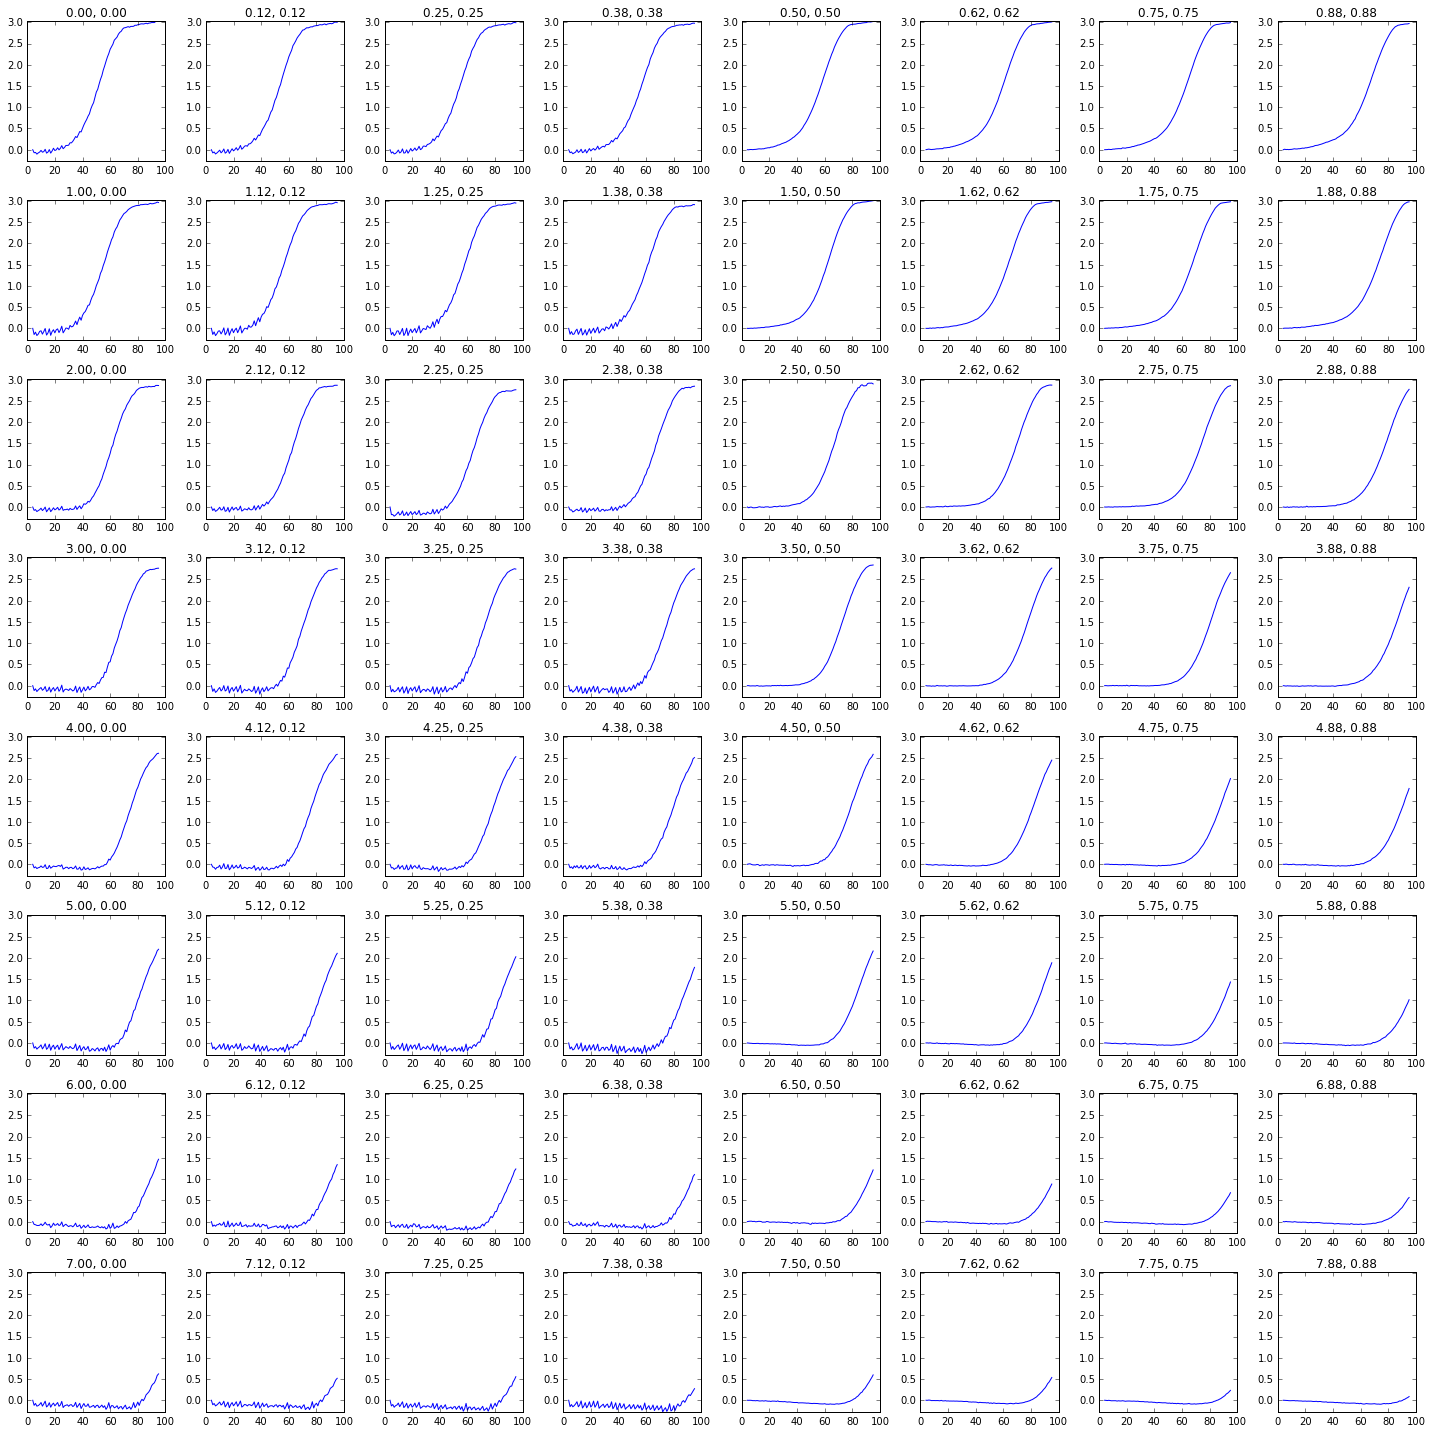

In [53]:
plt.figure(figsize=(20,20))

ylim = (data.min().min(),data.max().max())

for i in range(8):
    for j in range(8):
        num = i%8+j*8
        c1 = 1.*num/8
        c2 = 1.*num%8/8
        plt.subplot(8,8,num+1)
        plt.plot(data.iloc[:,num])
        plt.ylim(ylim)
        #plt.title("%d, %d, %d"%(i,j,num))
        plt.title("%.2lf, %.2lf"%(c1,c2))
    
plt.tight_layout()

In [32]:
concs[0].factorize()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 Float64Index([     0.0, 0.015625,  0.03125, 0.046875,   0.0625, 0.078125,
                0.09375, 0.109375,    0.125, 0.140625,  0.15625, 0.171875,
                 0.1875, 0.203125,  0.21875, 0.234375,     0.25, 0.265625,
                0.28125, 0.296875,   0.3125, 0.328125,  0.34375, 0.359375,
                  0.375, 0.390625,  0.40625, 0.421875,   0.4375, 0.453125,
                0.46875, 0.484375,      0.5, 0.515625,  0.53125, 0.546875,
                 0.5625, 0.578125,  0.59375, 0.609375,    0.625, 0.640625,
                0.65625, 0.671875,   0.6875, 0.703125,  0.71875, 0.734375,
                   0.75, 0.765625,  0.78125, 0.796875,   0.8125, 0.828125,
                0.84375, 0.8593

In [33]:
concs[0]

0     0.000000
1     0.015625
2     0.031250
3     0.046875
4     0.062500
5     0.078125
6     0.093750
7     0.109375
8     0.125000
9     0.140625
10    0.156250
11    0.171875
12    0.187500
13    0.203125
14    0.218750
15    0.234375
16    0.250000
17    0.265625
18    0.281250
19    0.296875
20    0.312500
21    0.328125
22    0.343750
23    0.359375
24    0.375000
25    0.390625
26    0.406250
27    0.421875
28    0.437500
29    0.453125
        ...   
35    0.546875
36    0.562500
37    0.578125
38    0.593750
39    0.609375
40    0.625000
41    0.640625
42    0.656250
43    0.671875
44    0.687500
45    0.703125
46    0.718750
47    0.734375
48    0.750000
49    0.765625
50    0.781250
51    0.796875
52    0.812500
53    0.828125
54    0.843750
55    0.859375
56    0.875000
57    0.890625
58    0.906250
59    0.921875
60    0.937500
61    0.953125
62    0.968750
63    0.984375
64    1.000000
Name: 0, dtype: float64

In [15]:
column_concentrations(4)

(0.0625, 0.5)